In [1]:
# Noah: personal work on Project 1, Number 1
### Imports ###
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Eigenfunctions and Eigenvalues ###
def eigenvalue(n):
    return 1 / ((n-0.5)**2 * np.pi**2)

def eigenfunc(x, lambda_n):
    return np.sqrt(2)*np.sin(x / np.sqrt(lambda_n))

### Alpha Bar ###

def alpha_bar(x):
    return (1/8) * (x+1)**2

eigenvalue_vect = np.vectorize(eigenvalue)

# N : number of terms in the expansion
def karhunen_loeve(N, xs):
    s = 0
    for n in np.arange(1,N+1):
        lambda_n = eigenvalue(n)
        s += np.sqrt(lambda_n) * eigenfunc(xs, lambda_n) * np.random.normal(0,1)
    s += alpha_bar(xs)
    return s

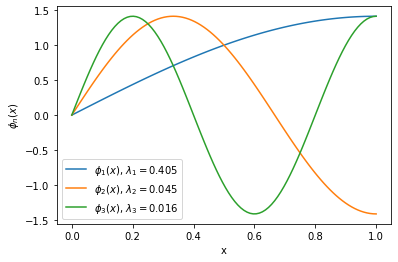

In [39]:
### Plot 1st Three Eigenvalues/Eigenfunctions ###
N_xs = 100
xs = np.linspace(0,1,N_xs)

fig4, ax4 = plt.subplots()
lambda_1 = eigenvalue(1)
lambda_2 = eigenvalue(2)
lambda_3 = eigenvalue(3)

ax4.plot(xs, eigenfunc(xs, lambda_1), label = r"$\phi_1(x)$, $\lambda_1 = %.3f$" % lambda_1)
ax4.plot(xs, eigenfunc(xs, lambda_2), label = r"$\phi_2(x)$, $\lambda_2 = %.3f$" % lambda_2)
ax4.plot(xs, eigenfunc(xs, lambda_3), label = r"$\phi_3(x)$, $\lambda_3 = %.3f$" % lambda_3)

ax4.set_xlabel("x")
ax4.set_ylabel("$\phi_n(x)$")

plt.legend()

Text(0.5, 1.0, '1000 Realizations of Karhunen-Loeve $N = 3$ expansion')

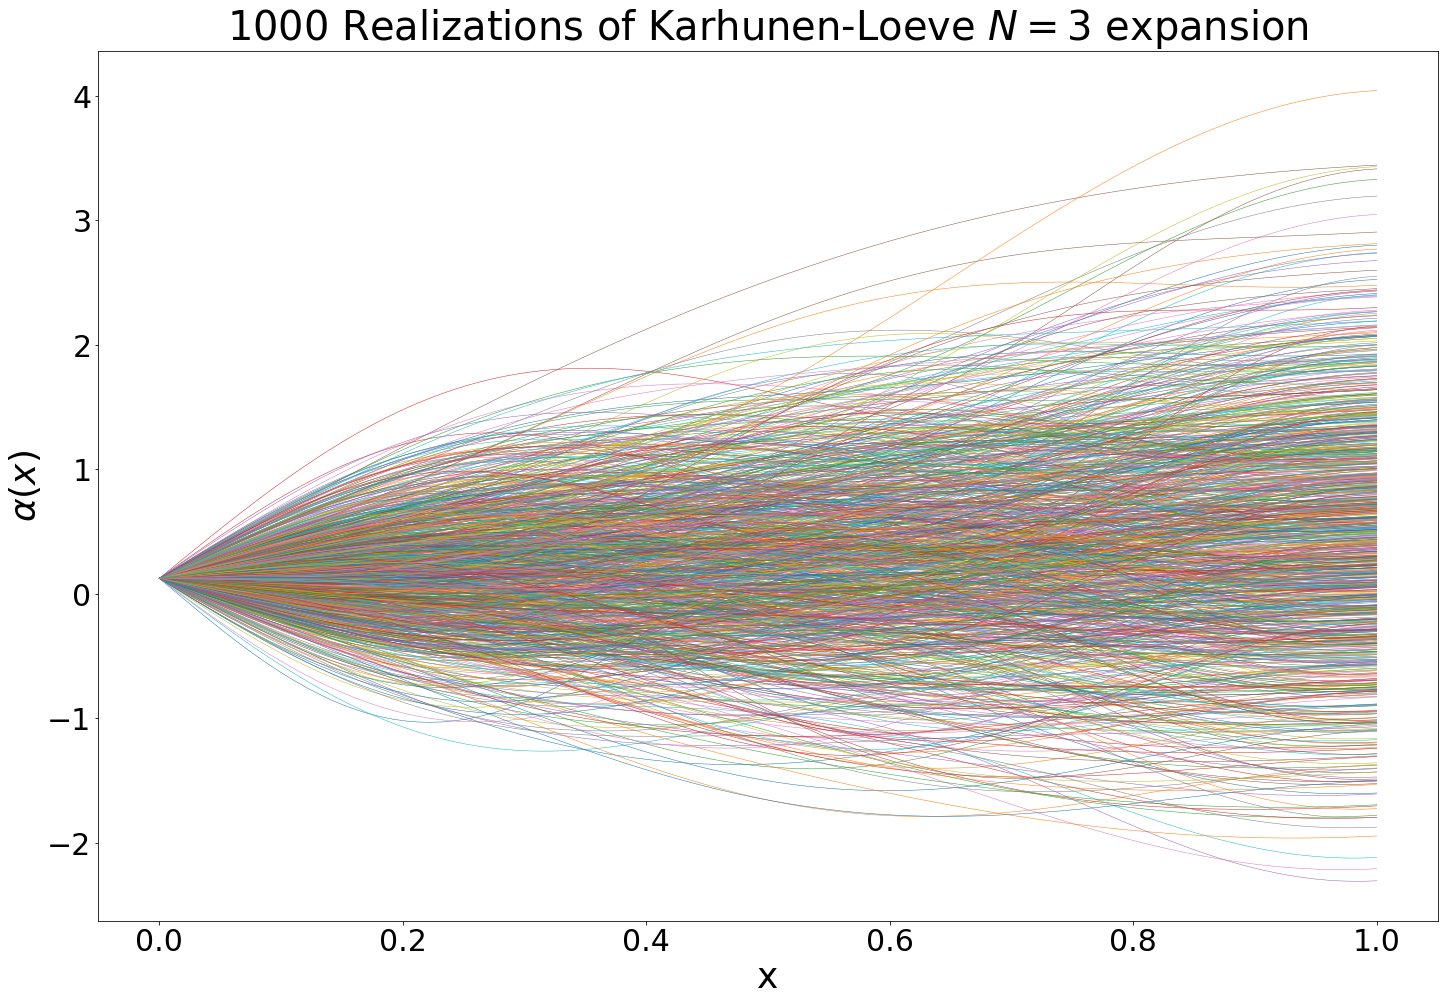

In [25]:
realizations = [ karhunen_loeve(3, xs) for n in range(1000) ]
fig3, ax3 = plt.subplots(figsize=(24,16))
ax3.set_xlabel("x", fontsize=36)
ax3.set_ylabel(r"$\alpha(x)$", fontsize=36)
for r in realizations:
    ax3.plot(xs, r, linewidth=0.5)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax3.set_title(r"1000 Realizations of Karhunen-Loeve $N = 3$ expansion", fontsize = 40)

In [ ]:
#N_realizations = 1000
def beta(xs,N_realizations, N_terms):
    r = np.zeros( (N_realizations, len(xs)) )
    for i in range(0,N_realizations):
        r[i] = karhunen_loeve(N_terms,xs)
    return r

Text(0.5, 1.0, '1000 Realizations of $\\beta(0.5,\\omega)$ for N = 3')

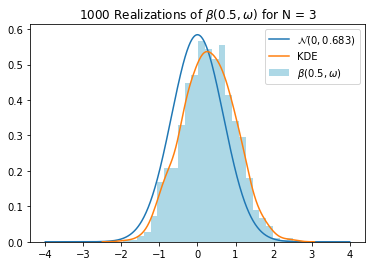

In [33]:
import scipy
fig = plt.figure()
ax = plt.subplot(111)
rs =beta(np.array([0.5]),1000, 3).flatten()

plt.hist( rs, density=True, stacked=True, bins=25, label=r"$\beta(0.5,\omega)$", color = "lightblue")

var = 0
for n in np.arange(1,4):
    lambda_n = eigenvalue(n)
    var += ( (lambda_n) * eigenfunc(0.5, lambda_n)**2 ) #note: var(X_i) = 1, as this is the variance of Q_n!

sd = np.sqrt(var)
gaussian_range = np.linspace(-4,4,1000)
approx_pdf = scipy.stats.norm.pdf(gaussian_range, loc=0, scale=sd)
plt.plot(gaussian_range, approx_pdf, label = r"$\mathcal{N}(0, %.3f)$" % sd)
sns.kdeplot(rs, label = "KDE")
plt.title(r"1000 Realizations of $\beta(0.5,\omega)$ for N = 3")

Text(0.5, 1.0, '1000 Realizations of $\\beta(0.5,\\omega)$ for N = 6')

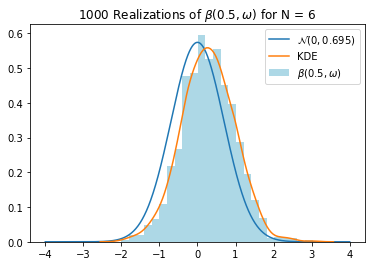

In [34]:
## lazy-- just copied code in previous cell, changed N to 6

import scipy
fig = plt.figure()
ax = plt.subplot(111)
rs =beta(np.array([0.5]),1000, 6).flatten()

plt.hist( rs, density=True, stacked=True, bins=25, label=r"$\beta(0.5,\omega)$", color = "lightblue")
var = 0
for n in np.arange(1,7):
    lambda_n = eigenvalue(n)
    var += ( (lambda_n) * eigenfunc(0.5, lambda_n)**2 ) #note: var(X_i) = 1, as this is the variance of Q_n!

sd = np.sqrt(var)
gaussian_range = np.linspace(-4,4,1000)
approx_pdf = scipy.stats.norm.pdf(gaussian_range, loc=0, scale=sd)
plt.plot(gaussian_range, approx_pdf, label = r"$\mathcal{N}(0, %.3f)$" % sd)
sns.kdeplot(rs, label = "KDE")
plt.title(r"1000 Realizations of $\beta(0.5,\omega)$ for N = 6")